<a href="https://colab.research.google.com/github/Ateeth/AirBNB-dataset-analysis/blob/main/BusinessInelligenceDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 1( Initial notebook) https://www.kaggle.com/code/jrw2200/smart-pricing-with-xgb-rfr-interpretations/notebook

Notebook 2 (Well written summary)
https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb

Notebook 3
https://www.kaggle.com/code/jominjae/airbnb-prediction-rf-gb-xgb-lgb#LOAD-DATA-AND-EDA

Notebook 4
https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction

Predictive analysis notebook
https://colab.research.google.com/drive/1rLHeSoMoSLpRyPdvkV4EJuylhMjQfv5F#scrollTo=e_28kIq4fMV4

#Import Libraries

In [107]:
import pandas as pd
#visulaization modules

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

plt.rc('figure',figsize=(17,13))
sns.set_context('paper',font_scale=2)

init_notebook_mode(connected= True)

import numpy as np

#Load the dataset and initial analysis

In [108]:
df = pd.read_csv (r'https://raw.githubusercontent.com/Ateeth/AirBNB-dataset-analysis/main/AirBNBdataset.csv')
print (df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [110]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Number of features: 16
Number of examples: 48895


##Drop Unnecessary Columns

In [111]:
df.drop(['host_name','name' , 'last_review'], axis=1, inplace=True)

#Visualize and Handle Missing Values

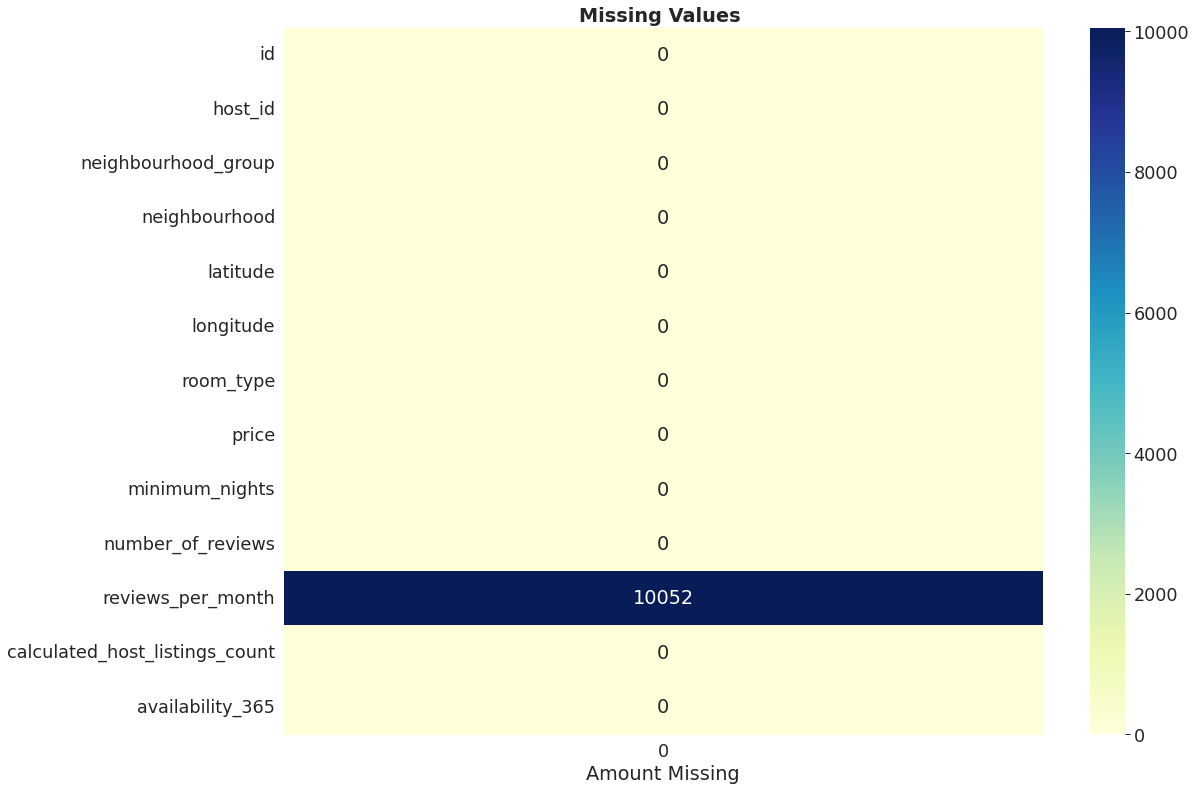

In [112]:
plt.title('Missing Values ',fontweight='bold')
ax=sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='YlGnBu',cbar=True)
ax.set_xlabel('Amount Missing')
plt.show()

##Make reviews per month NaN as 0

In [113]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

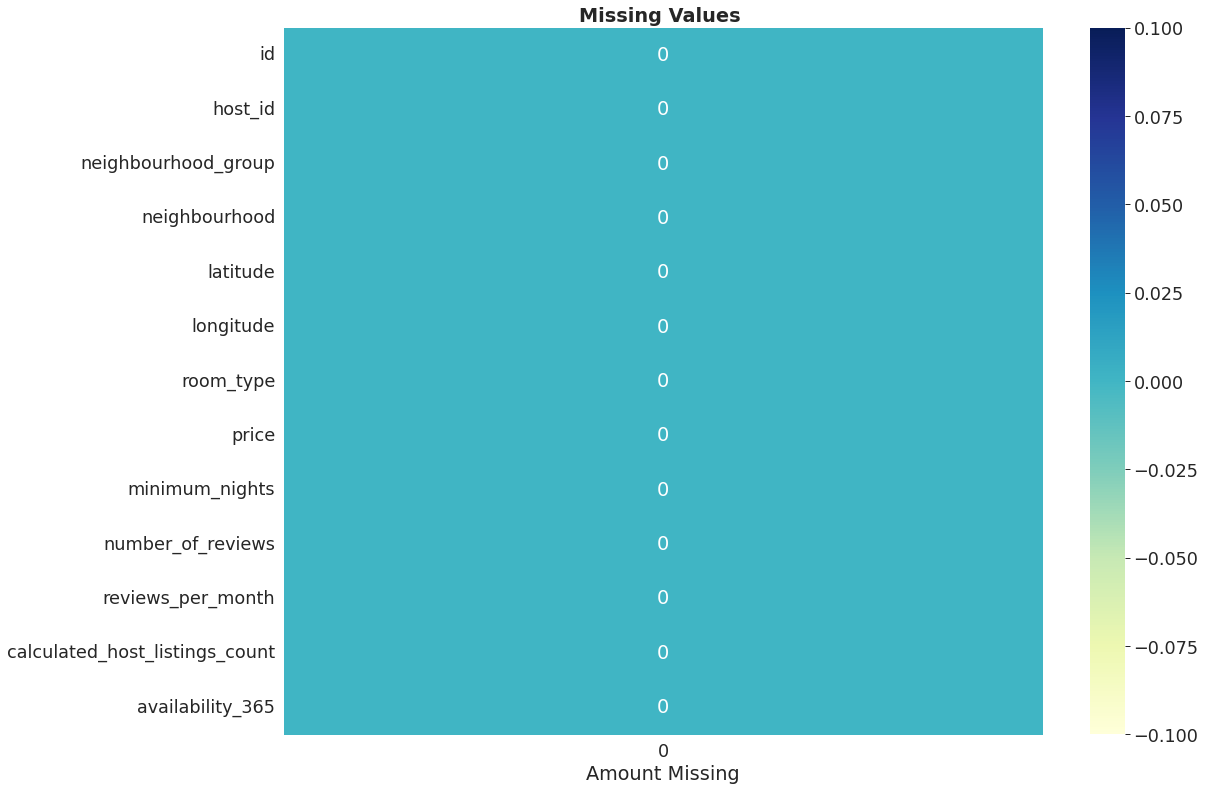

In [114]:
plt.title('Missing Values ',fontweight='bold')
ax=sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='YlGnBu',cbar=True)
ax.set_xlabel('Amount Missing')
plt.show()

#STATISTICAL ANALYSIS OF NUMERIC AND CATEGORICAL DATA

##Statistical analysis of data

###Statistical analysis of numerical data

In [115]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,19017143.24,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.09,7.14,112.78
std,10983108.39,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.60,32.95,131.62
min,2539.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,9471945.00,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.04,1.00,0.00
50%,19677284.00,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,29152178.50,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,36487245.00,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


###Statistical analysis of categorical data

In [116]:
# stats of categorical data
df.describe(exclude = ['float', 'int64'])

,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


####Unique values of neighbourhood groups

In [117]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

####Unique values of neighbourhoods

In [118]:
len(df.neighbourhood.unique())

221

####Unique values of room type

In [119]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## **Exploring and Visualization of Data**



### **Visualizing the distribution of each feature**

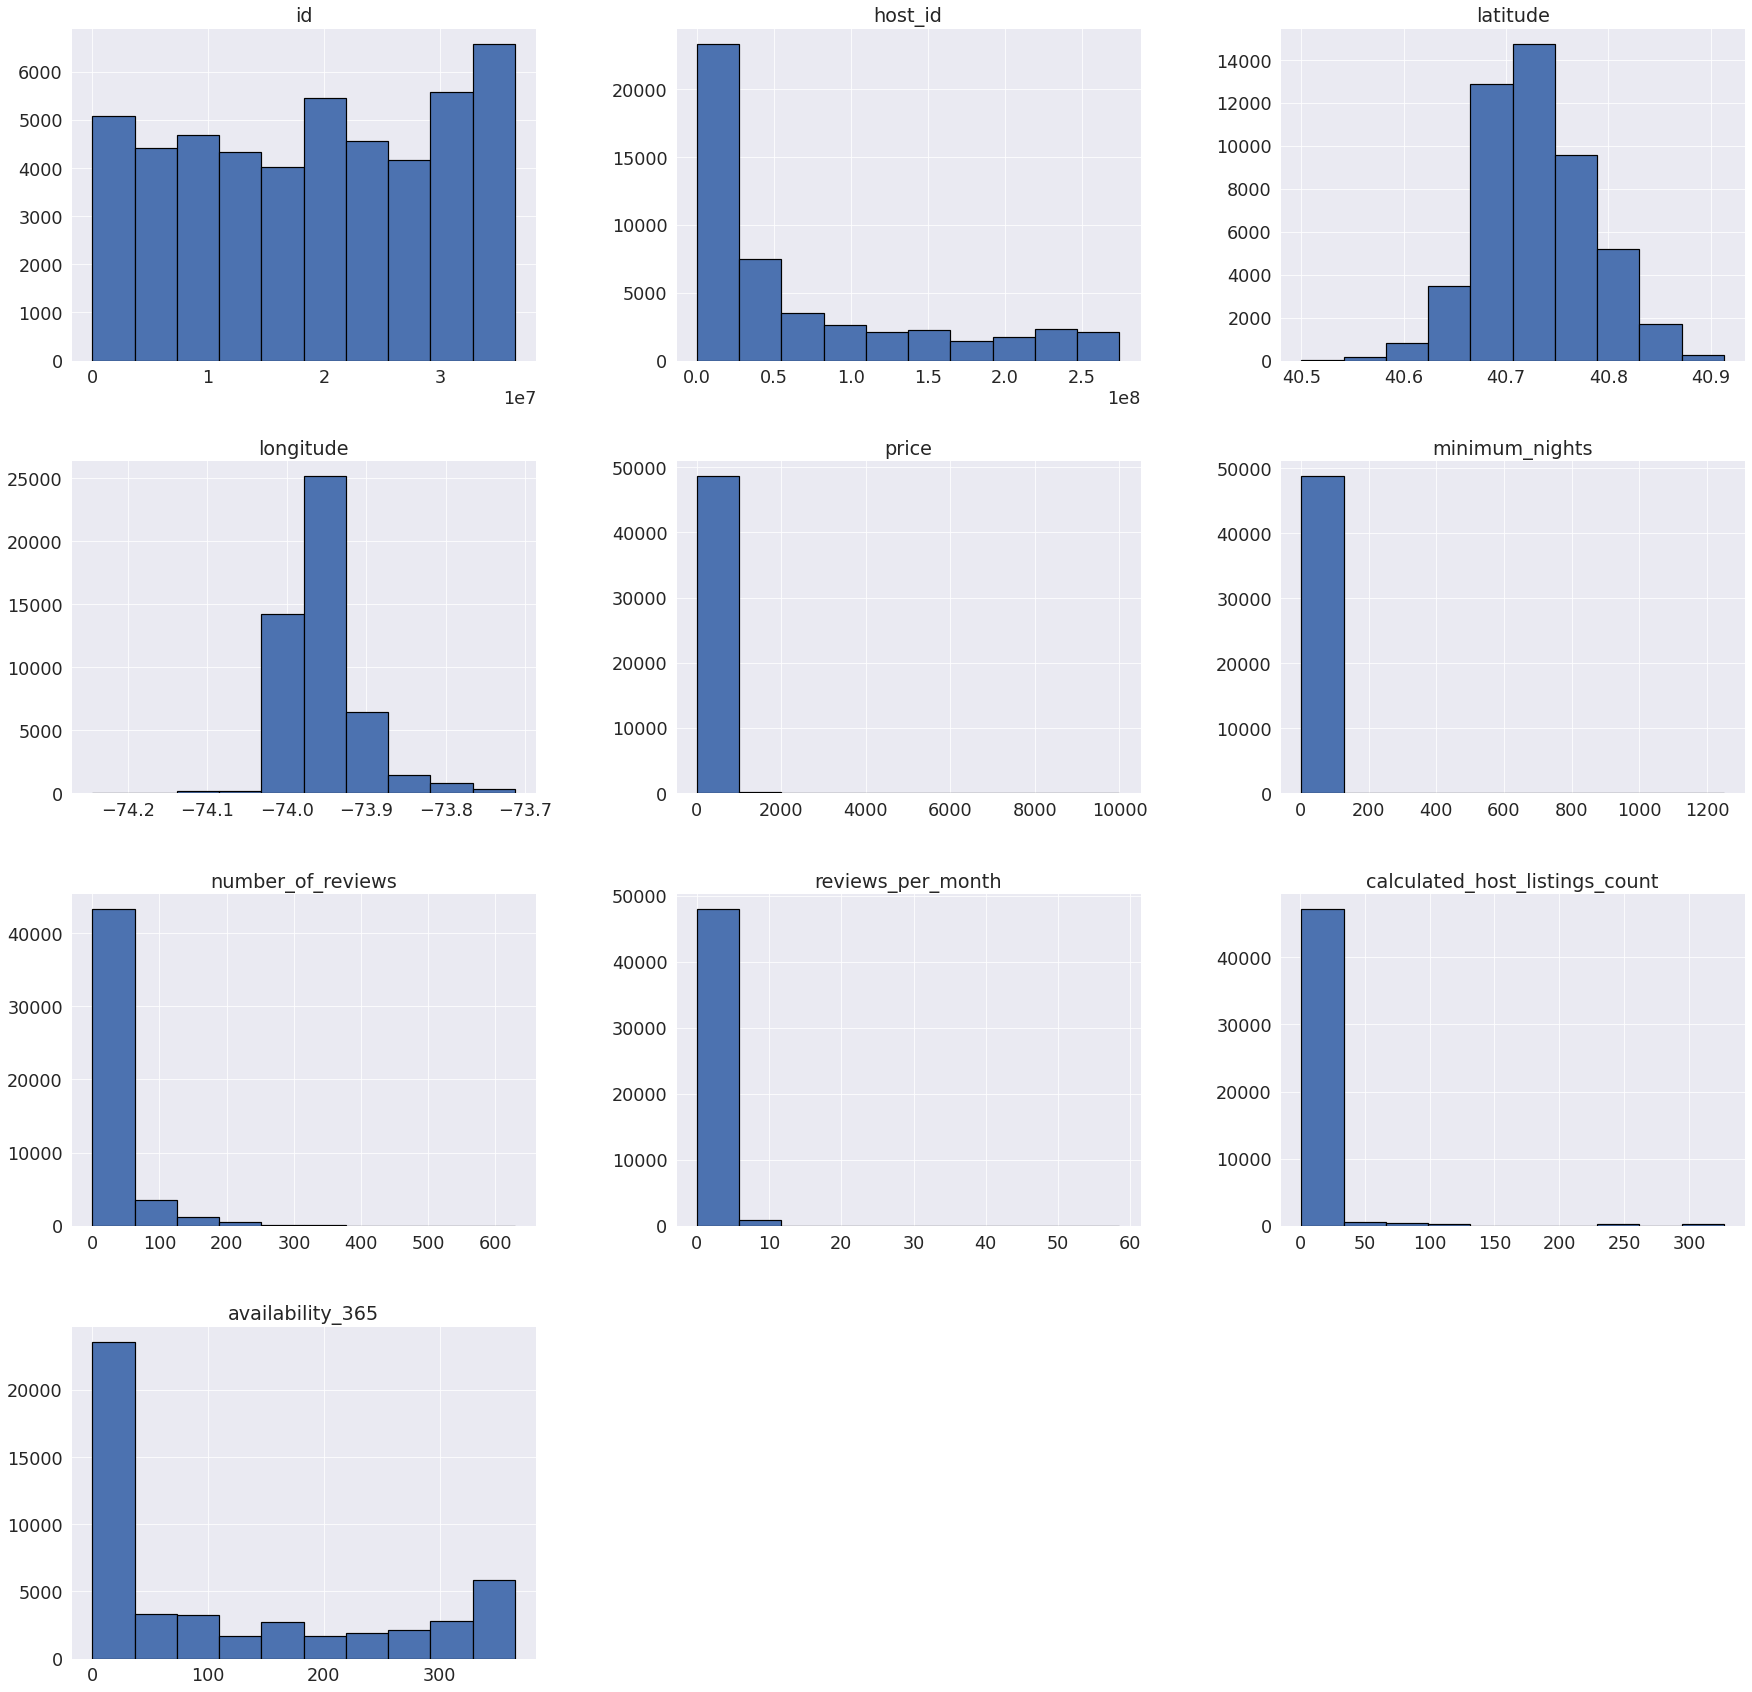

In [120]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

<Figure size 2160x2160 with 0 Axes>

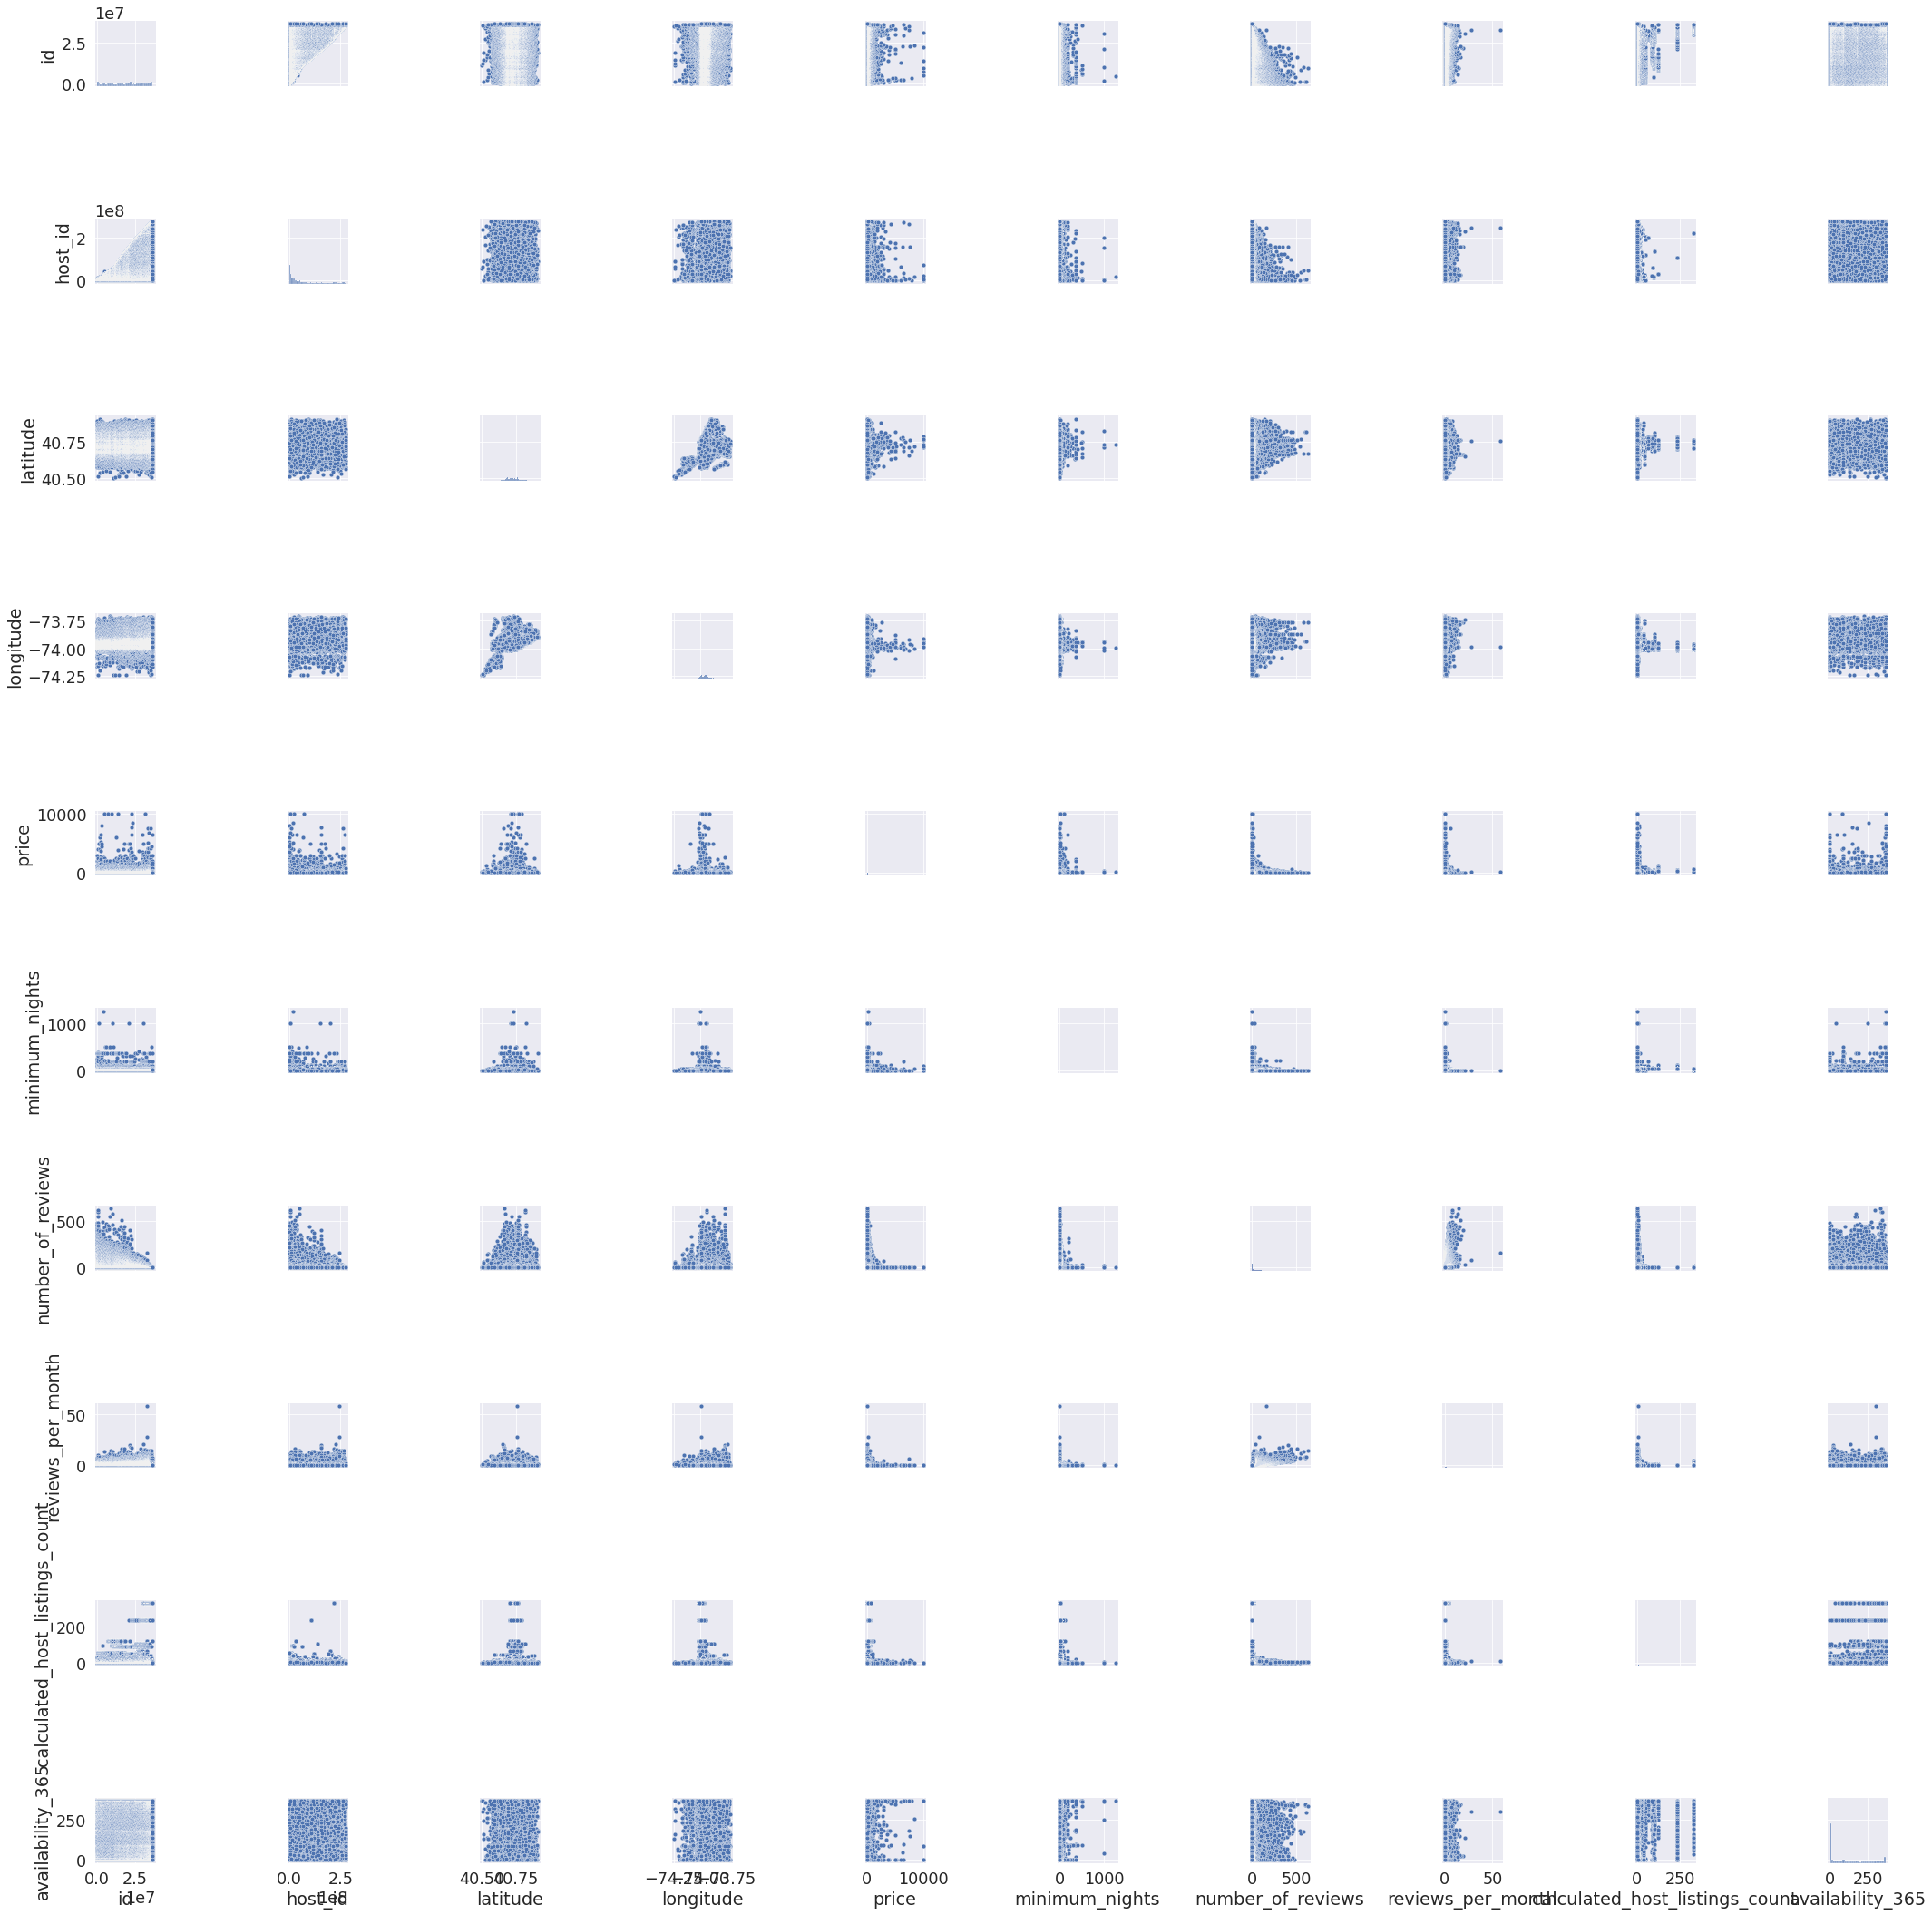

In [121]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, height=3, diag_kind="hist")

###Set Figure Size for Vizualization

In [122]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

###Top Hosts

####Find top 10 hosts

In [123]:
top_host = df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [124]:
top_host_check = df.calculated_host_listings_count.max()
top_host_check

327

**We have verified that the maximum occurences of host id is 327**

####Create a dataframe for host_id and number of occurences

In [125]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


####Bar Plot of the top 10 hosts and their frequency of occurence in the data

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

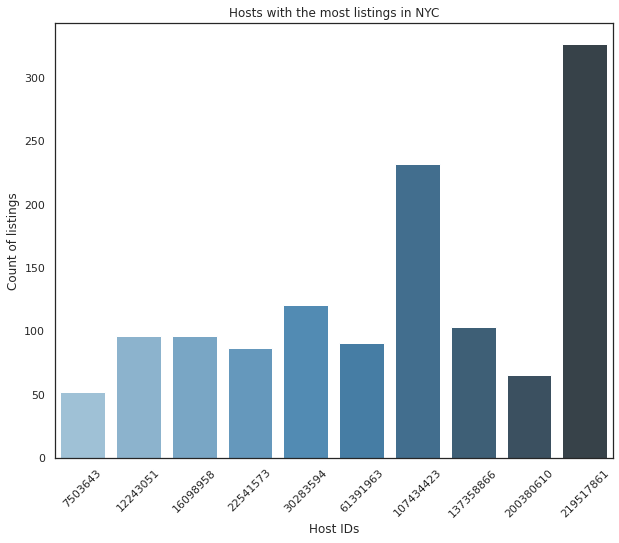

In [126]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

**There is a good distribution among top 10 hosts in NYC and the top host has a count of more than 300**

###Neighbourhood Groups

In [127]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]

#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]

#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]

#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]

#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [128]:
#price distributions will be appended in the below list
price_dist=[]

#creating list with known values in neighbourhood_group column
neighbour_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_dist.append(i)

#changing names of the price column to the area name for easier reading of the table    
price_dist[0].rename(columns={'price':neighbour_list[0]}, inplace=True)
price_dist[1].rename(columns={'price':neighbour_list[1]}, inplace=True)
price_dist[2].rename(columns={'price':neighbour_list[2]}, inplace=True)
price_dist[3].rename(columns={'price':neighbour_list[3]}, inplace=True)
price_dist[4].rename(columns={'price':neighbour_list[4]}, inplace=True)

#finalizing our dataframe for final view    
stats_df=price_dist
stats_df=[df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


**It can be seen in the above statistical table some prices are extreme i.e 0 so we can remove those rows in that case**

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

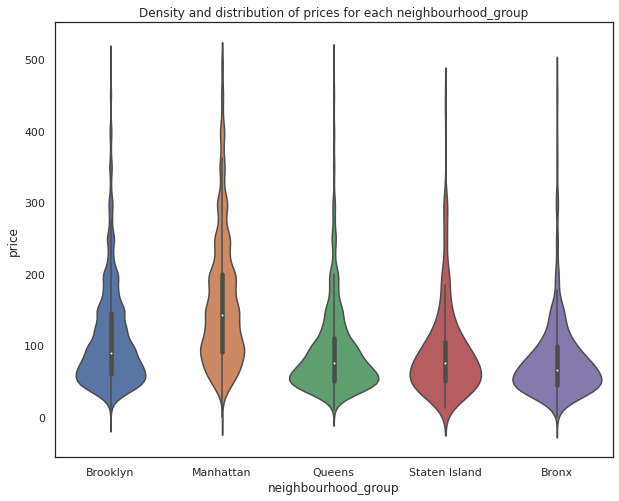

In [129]:
#creating a sub-dataframe with no extreme values / less than 500
sub_df=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group')

*   Manhattan has the highest range of prices for the listings with USD.150 price as average observation, followed by Brooklyn with USD.90 per night. 
*   Queens and Staten Island appear to have very similar distributions.
*   Bronx is the cheapest of them all. 
*   This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.





### **Neighbourhoods**

#### **Most Popular Neighbourhoods**

<BarContainer object of 10 artists>

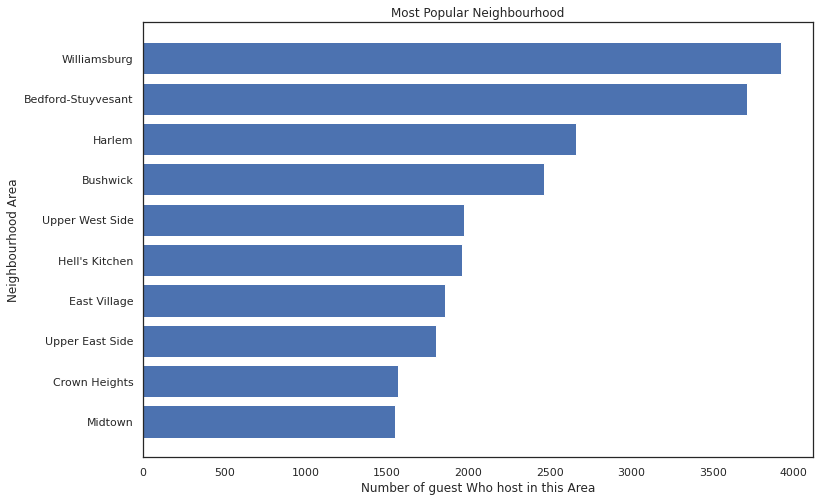

In [130]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

**There are too many neighbourhoods so only the top 10 are considered**

In [131]:
#finding out top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

####Visualize different neighbourhoods and the number of rooms of each type in each neighbourhood

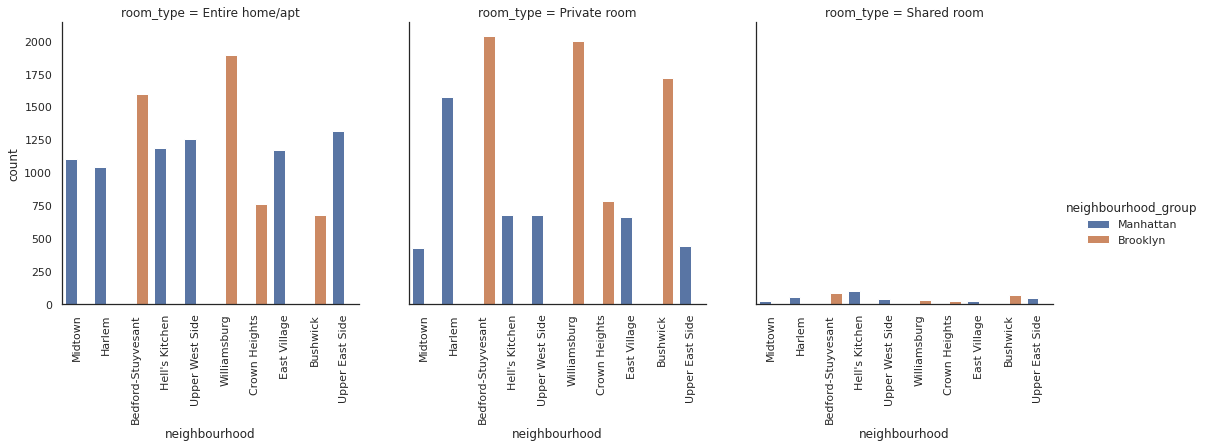

In [132]:
sub1_df = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub1_df, kind='count')
viz_3.set_xticklabels(rotation=90)

*   The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods.
*   It can be seen that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn which was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability.
*   It can also be observed that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.





**New York Map**

###Latitude and Longitude

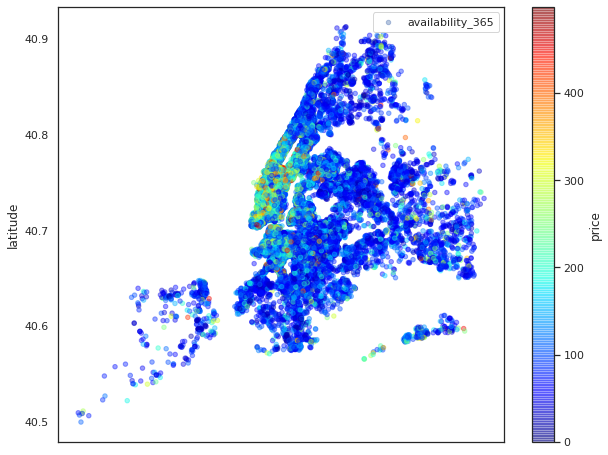

In [133]:
viz_4=sub_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

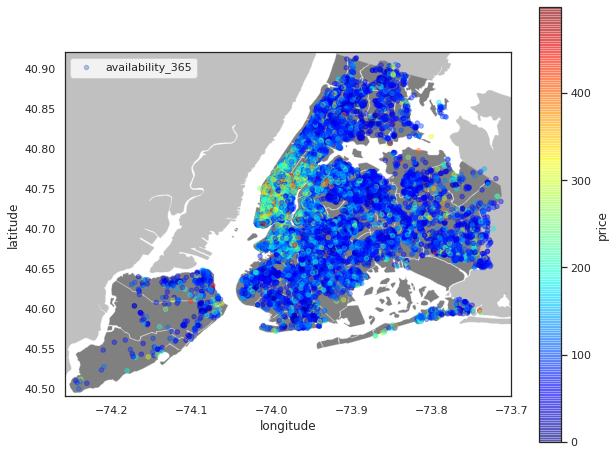

In [134]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

###Price

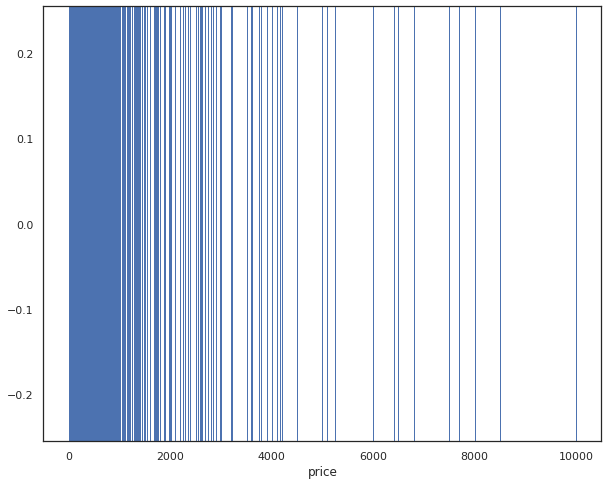

In [135]:
sns.rugplot(data=df, x='price', height=1)

**It can be observed that only a few rooms are ranked at extremely high prices and some are having too low prices. They could be outliers for the data and hence they can be filtered out.**

In [136]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

799.0 30.0


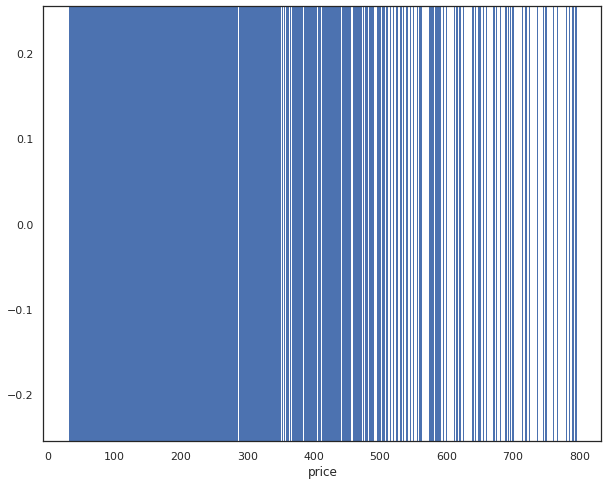

In [137]:
df = df[(df['price']<p1) & (df['price']>p2)]
sns.rugplot(data=df, x='price', height=1)

###Minimum Nights



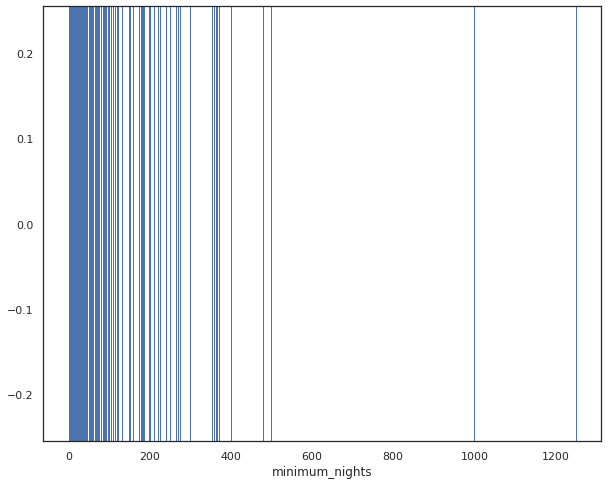

In [138]:
sns.rugplot(data=df, x='minimum_nights', height=1)

**Notice the values of 1000 and 1200 they serve as outliers to our data and they can be filtered out**

In [139]:
m1 = df['minimum_nights'].quantile(0.99)
print(m1)
df = df[(df['minimum_nights']<m1)]

40.0


Here we will filter out rows less than 99% of observations for minimimu nights

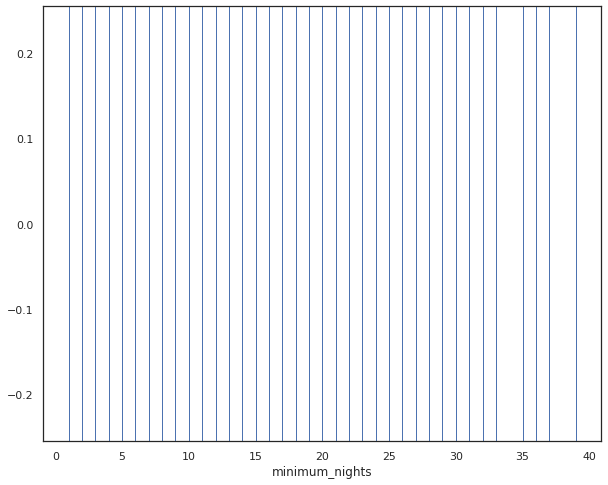

In [140]:
sns.rugplot(data=df, x='minimum_nights', height=1)

###Neighbourhood

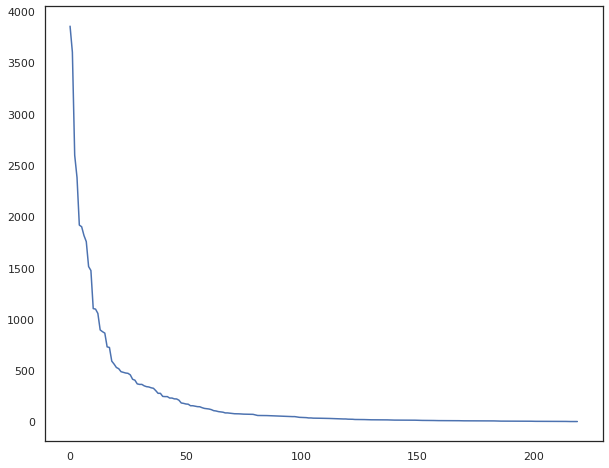

In [141]:
nb = df['neighbourhood'].value_counts()
plt.plot(range(len(nb)), nb)

**It is observed that many neighbourhoods occur only 1 time and so if the number of occurence of a neighbourhood occur outside the top 25 most occuring we can consider it as others**

In [142]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) in nb[:25] else 'others')

###Box Plots

In [143]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

550.0 35.0


####Price v/s Room Type

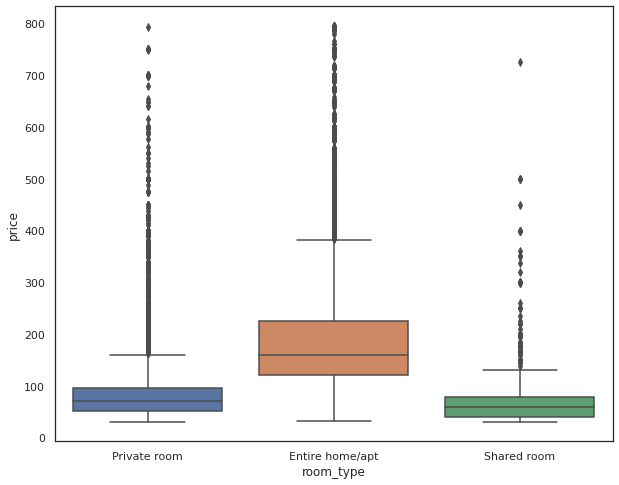

In [144]:
sns.boxplot(data=df, x='room_type', y='price')

####Neighbourhood group v/s Price

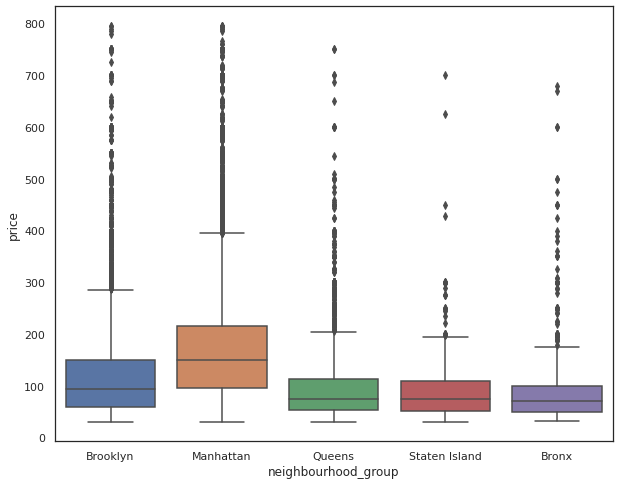

In [145]:
sns.boxplot(data=df, x='neighbourhood_group', y='price')

####Neighbourhood v/s price

In [146]:
df.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

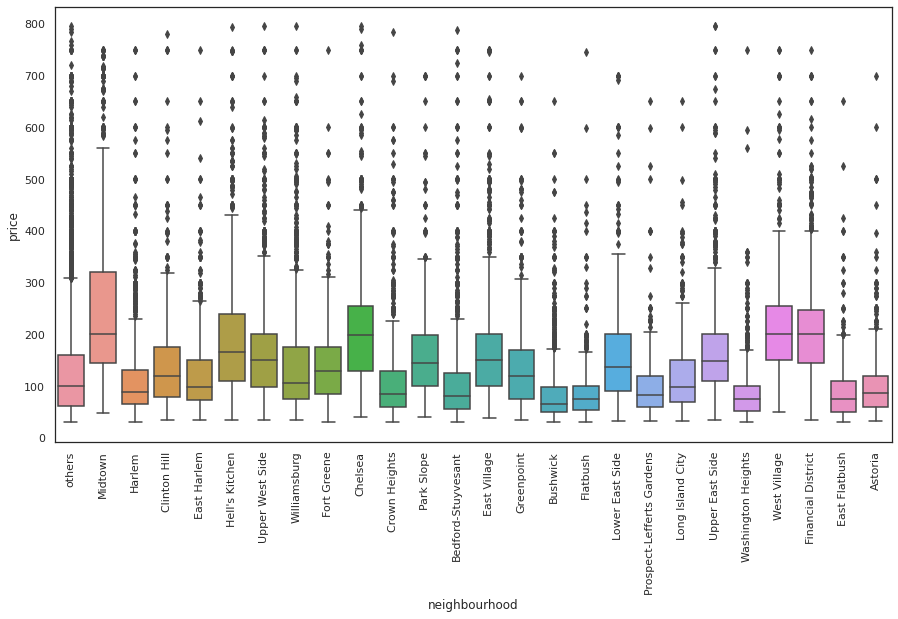

In [147]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.show()

####Heatmap

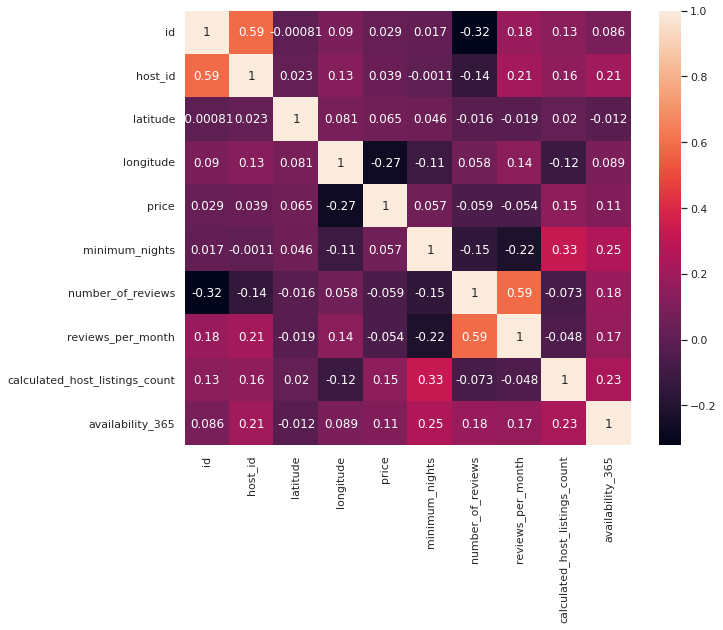

In [148]:
sns.heatmap(data=df.corr(), annot=True)

There don't appear to exist obvious, strong correlations between these variables.

Number of reviews per month is fairly  correlated with the total number of reviews.

The longitude is anticorrelated (-0.27) with the price. That also makes sense as property in the Bronx and in Queens is cheaper than Manhattan and Brooklyn.

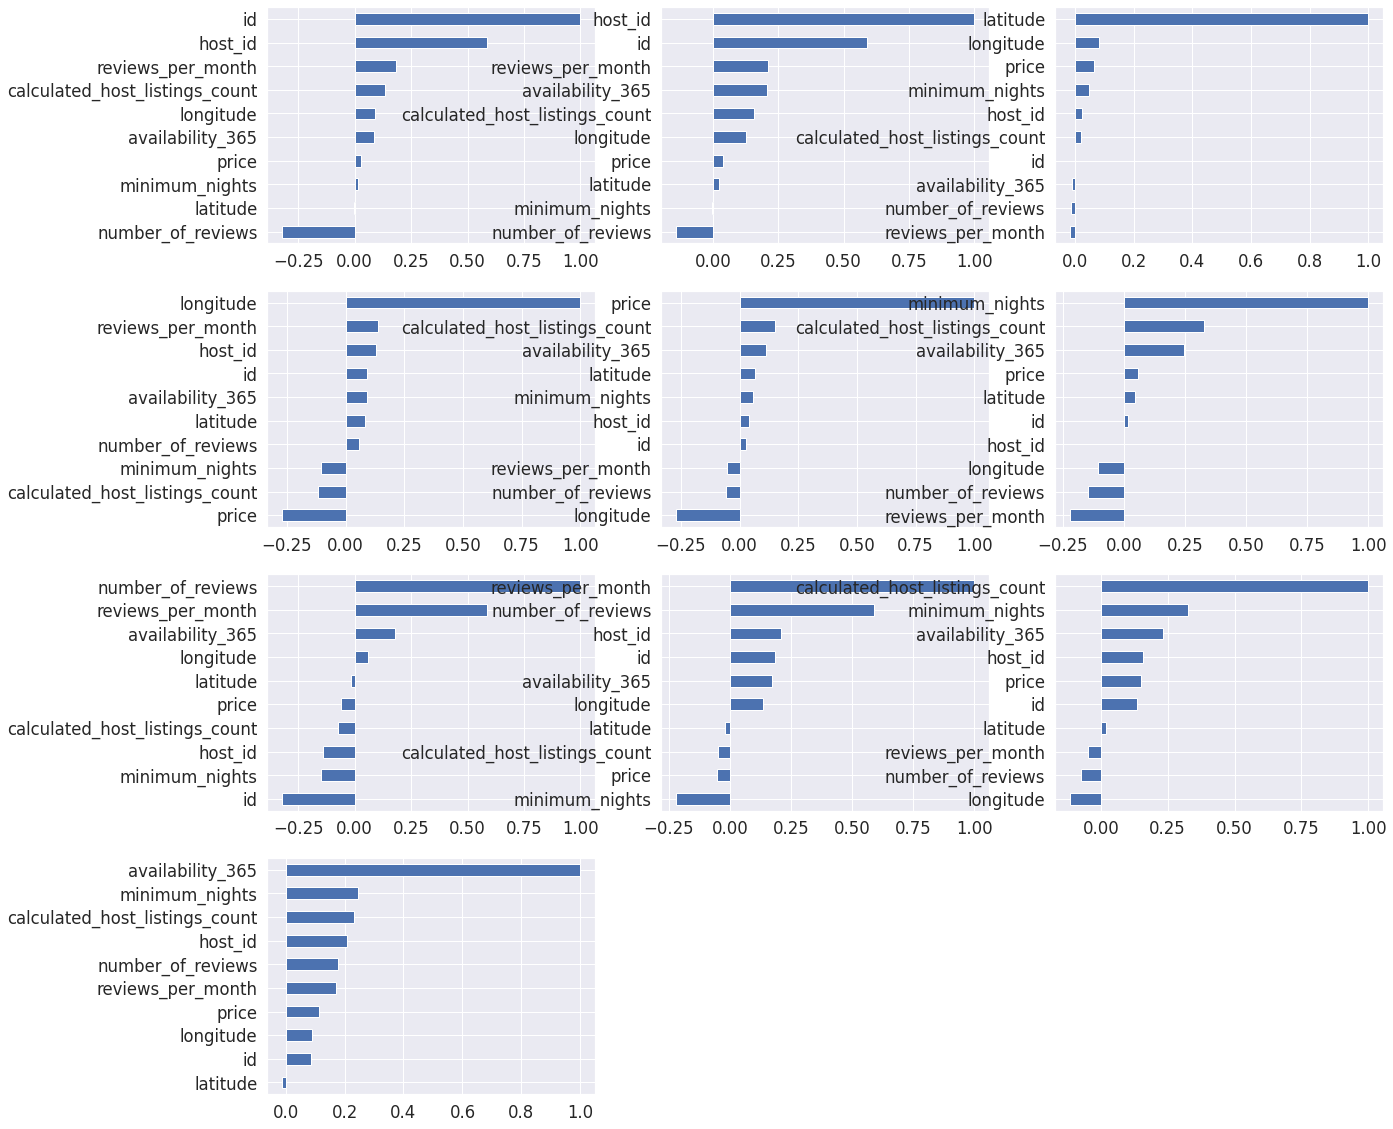

In [149]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
i = 1
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        plt.subplot(4, 3, i)
        df.corr()[column].sort_values().plot(kind="barh")
        i += 1

In [150]:
df.drop(['id',  'host_id',  'latitude', 'longitude'], axis=1, inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47262 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             47262 non-null  object 
 1   neighbourhood                   47262 non-null  object 
 2   room_type                       47262 non-null  object 
 3   price                           47262 non-null  int64  
 4   minimum_nights                  47262 non-null  int64  
 5   number_of_reviews               47262 non-null  int64  
 6   reviews_per_month               47262 non-null  float64
 7   calculated_host_listings_count  47262 non-null  int64  
 8   availability_365                47262 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.6+ MB


##Data Preprocessing

In [152]:
X_numerical = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
X_categorical = df.drop(['minimum_nights', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price'], axis=1)

In [153]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,others,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [154]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [155]:
le = LabelEncoder()
for i in X_categorical.columns:
  X_categorical[i] = le.fit_transform(X_categorical[i])

In [156]:
scaler = StandardScaler()
scaler.fit(X_numerical)
X_scaled = scaler.transform(X_numerical)
X_scaled = pd.DataFrame(X_scaled, index=X_numerical.index, columns=X_numerical.columns)
X = pd.concat([X_scaled, X_categorical], axis=1)
y=df['price']

In [157]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,reviews_per_month
0,-0.561620,-0.325960,-0.036687,1.937064,1,25,1,21
1,-0.561620,0.474904,-0.156684,1.860672,2,17,0,38
2,-0.322688,-0.526176,-0.186684,1.937064,2,13,1,0
3,-0.561620,5.480304,-0.186684,0.630760,1,4,0,464
4,0.513573,-0.325960,-0.186684,-0.851246,2,7,0,10


##Model Learning

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

###Linear Regression

In [160]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [161]:
pred_LR = model_LR.predict(X_test)
MAE_LR = mean_absolute_error(y_test, pred_LR)
MSE_LR = sqrt(mean_squared_error(y_test, pred_LR))
R2_LR = r2_score(y_test,pred_LR)
print("Mean Absolute Error Linear Regressor : " + str(MAE_LR))
print("Mean Squared Error Linear Regressor : " + str(MSE_LR))
print("R2 score Linear Regressor : " + str(R2_LR))

Mean Absolute Error Linear Regressor : 56.51309156209504
Mean Squared Error Linear Regressor : 88.3372774931344
R2 score Linear Regressor : 0.2894733241508758


###Random Forest Regressor

In [162]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [163]:
pred_RF = model_RF.predict(X_test)
MAE_RF = mean_absolute_error(y_test, pred_RF)
MSE_RF = sqrt(mean_squared_error(y_test, pred_RF))
R2_RF = r2_score(y_test , pred_RF)
print("Mean Absolute Error Random Forest Regressor : " + str(MAE_RF))
print("Mean Squared Error Random Forest Regressor : " + str(MSE_RF))
print("R2 score Random Forest Regressor : " + str(R2_RF))

Mean Absolute Error Random Forest Regressor : 49.20967695404512
Mean Squared Error Random Forest Regressor : 80.30455057132471
R2 score Random Forest Regressor : 0.41281807474114274


###Gradient Boosting Regressor

In [164]:
model_GB = GradientBoostingRegressor()
model_GB.fit(X_train, y_train)

GradientBoostingRegressor()

In [165]:
pred_GB = model_GB.predict(X_test)
MAE_GB = mean_absolute_error(y_test, pred_GB)
MSE_GB = sqrt(mean_squared_error(y_test, pred_GB))
R2_GB = r2_score(y_test , pred_GB) 
print("Mean Absolute Error Gradient Boosting Regressor : " + str(MAE_GB))
print("Mean Squared Error Gradient Boosting Regressor : " + str(MSE_GB))
print("R2 score Gradient Boosting Regressor : " + str(R2_GB))

Mean Absolute Error Gradient Boosting Regressor : 48.55701556906969
Mean Squared Error Gradient Boosting Regressor : 79.47533707234143
R2 score Gradient Boosting Regressor : 0.4248817834377139


###XGB Regressor

In [166]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

[04:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [167]:
pred_XGB = model_XGB.predict(X_test)
MAE_XGB = mean_absolute_error(y_test, pred_XGB)
MSE_XGB = sqrt(mean_squared_error(y_test, pred_XGB)) 
R2_XGB = r2_score(y_test , pred_XGB)
print("Mean Absolute Error XGB Regressor : " + str(MAE_XGB))
print("Mean Squared Error XGB Regressor : " + str(MSE_XGB))
print("R2 score XGB Regressor : " + str(R2_XGB))

Mean Absolute Error XGB Regressor : 48.58338947290762
Mean Squared Error XGB Regressor : 79.63804162547908
R2 score XGB Regressor : 0.42252457074404637


###LGBM Regressor

In [168]:
model_LGB = lgb.LGBMRegressor()
model_LGB.fit(X_train, y_train)

LGBMRegressor()

In [169]:
pred_LGB= model_LGB.predict(X_test)
MAE_LGB = mean_absolute_error(y_test, pred_LGB)
MSE_LGB = sqrt(mean_squared_error(y_test, pred_LGB)) 
R2_LGB = r2_score(y_test , pred_LGB)
print("Mean Absolute LGBM Regressor : " + str(MAE_LGB))
print("Mean Squared Error LGBM Regressor : " + str(MSE_LGB))
print("R2 score LGBM Regressor : " + str(R2_LGB))

Mean Absolute LGBM Regressor : 46.31003864935021
Mean Squared Error LGBM Regressor : 76.29211933191604
R2 score LGBM Regressor : 0.4700294637833057


##Model Analysing

###Random Forest Regressor

Text(0.5, 0, 'Relative Importances (MDI)')

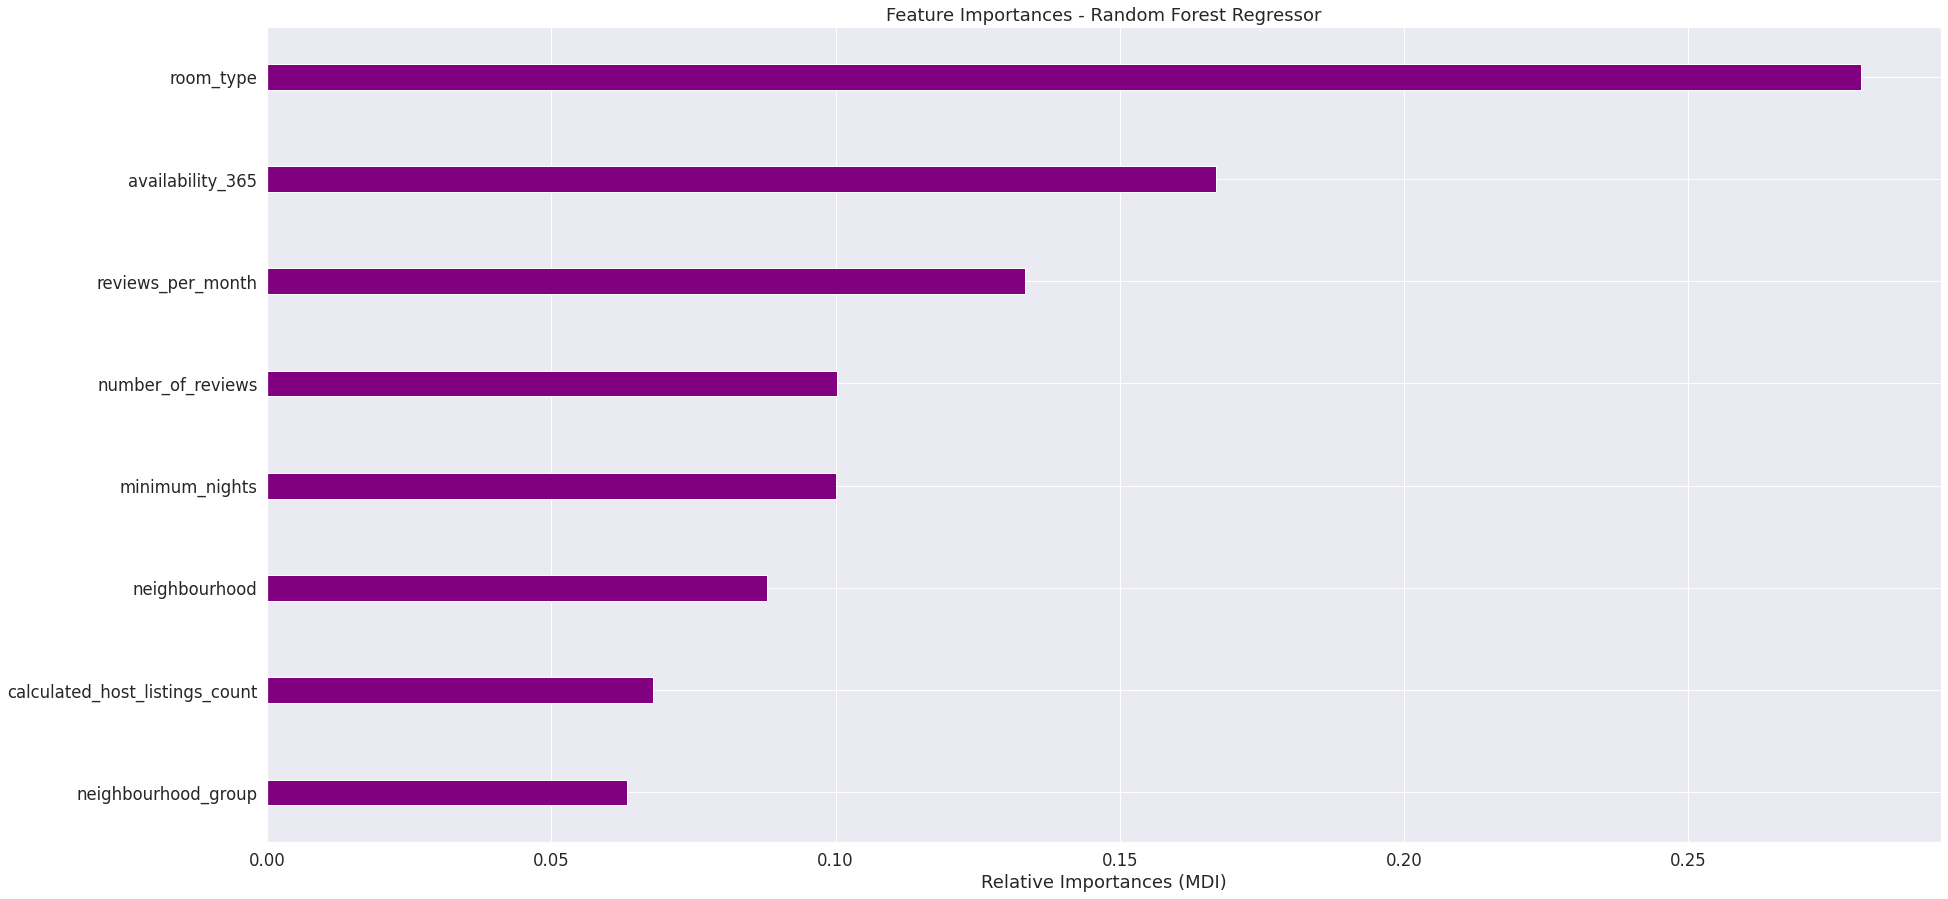

In [170]:
plt.figure(figsize=(30, 15))
importances_RF = model_RF.feature_importances_
indices_RF = np.argsort(importances_RF)

plt.title('Feature Importances - Random Forest Regressor')
plt.barh(X.columns, importances_RF[indices_RF], .25, color='purple')
plt.yticks(X.columns, X.columns[indices_RF])
plt.xlabel('Relative Importances (MDI)')

Text(0.5, 1.0, 'Random Forest Regressor')

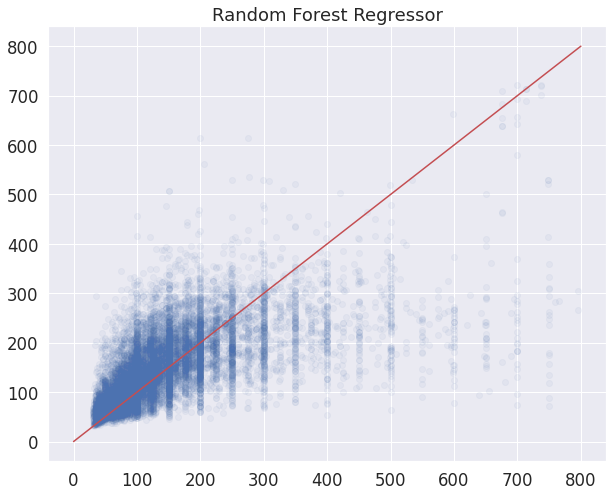

In [171]:
plt.scatter(x=y_test, y=pred_RF, alpha=0.05)
plt.plot([0, 800], [0,800], 'r-')
plt.title('Random Forest Regressor')

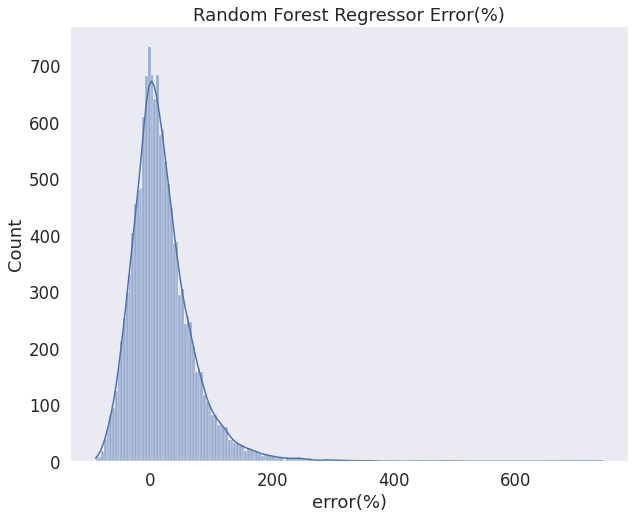

In [172]:
err_RF = (pred_RF-y_test)/y_test*100
sns.histplot(err_RF, kde=True)
plt.xlabel('error(%)')
plt.title('Random Forest Regressor Error(%)')
plt.grid()

###Gradient Booster Regressor

Text(0.5, 0, 'Relative Importances (MDI)')

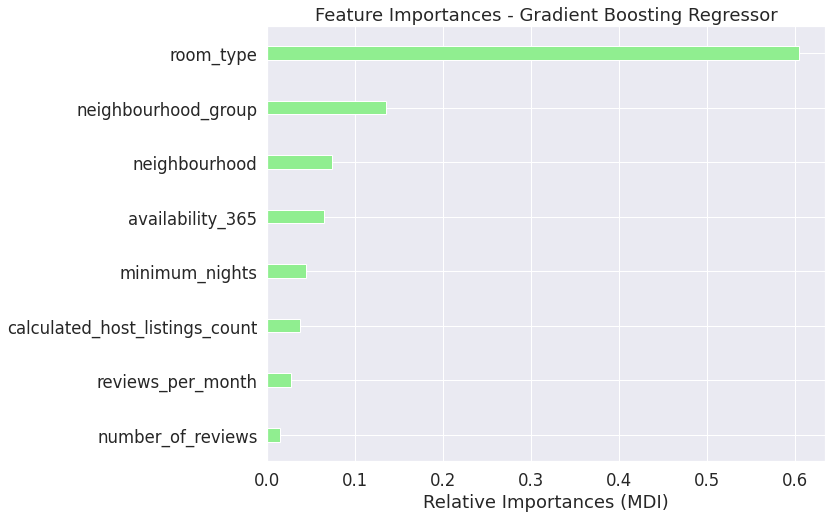

In [173]:
importances_GB = model_GB.feature_importances_
indices_GB = np.argsort(importances_GB)

plt.title('Feature Importances - Gradient Boosting Regressor')
plt.barh(X.columns, importances_GB[indices_GB], .25, color='lightgreen')
plt.yticks(X.columns, X.columns[indices_GB])
plt.xlabel('Relative Importances (MDI)')

Text(0.5, 1.0, 'Gradient Boosting Regressor')

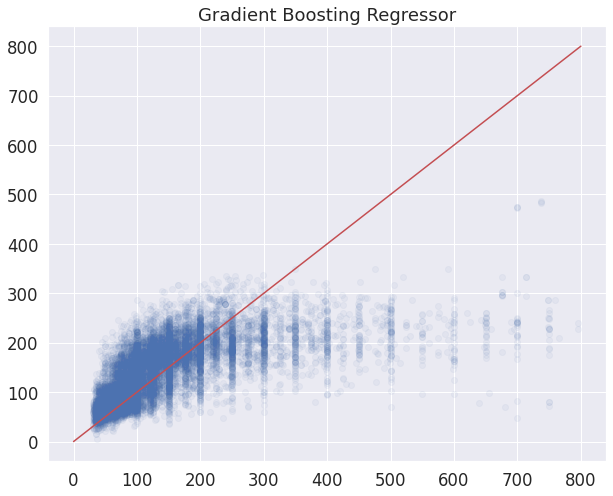

In [174]:
plt.scatter(x=y_test, y=pred_GB, alpha=0.05)
plt.plot([0, 800], [0,800], 'r-')
plt.title('Gradient Boosting Regressor')

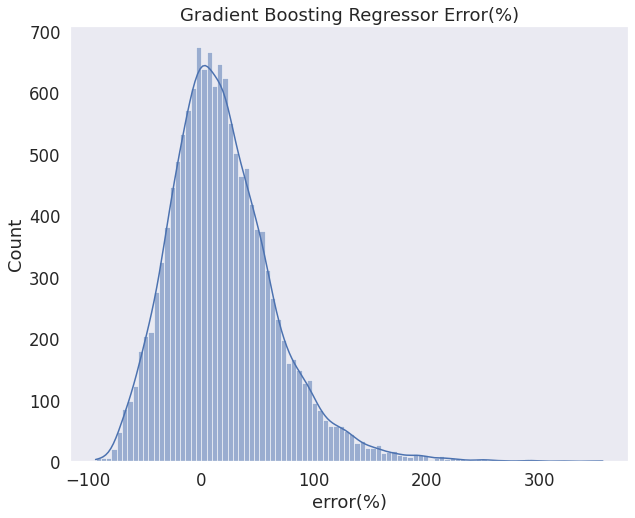

In [175]:
err_GB = (pred_GB-y_test)/y_test*100
sns.histplot(err_GB, kde=True)
plt.xlabel('error(%)')
plt.title('Gradient Boosting Regressor Error(%)')
plt.grid()

###XGB Regressor

Text(0.5, 0, 'Relative Importances (MDI)')

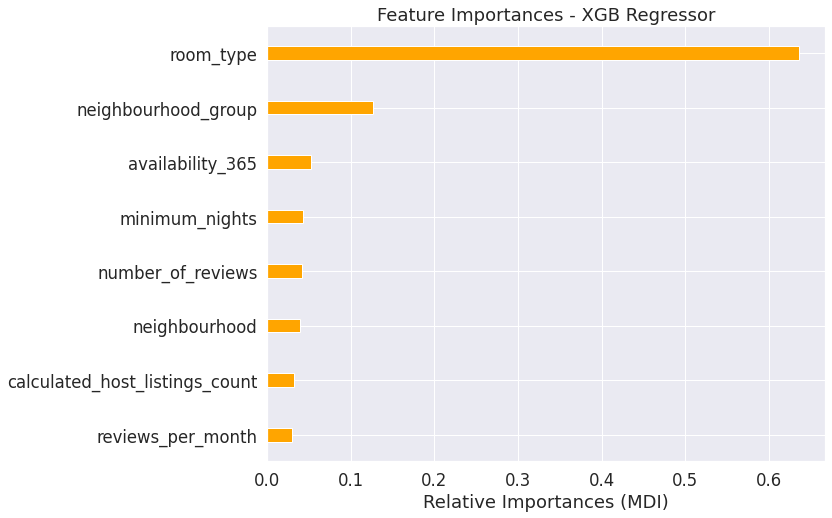

In [176]:
importances_XGB = model_XGB.feature_importances_
indices_XGB = np.argsort(importances_XGB)

plt.title('Feature Importances - XGB Regressor')
plt.barh(X.columns, importances_XGB[indices_XGB], .25, color='orange')
plt.yticks(X.columns, X.columns[indices_XGB])
plt.xlabel('Relative Importances (MDI)')

Text(0.5, 1.0, 'XGB Regressor')

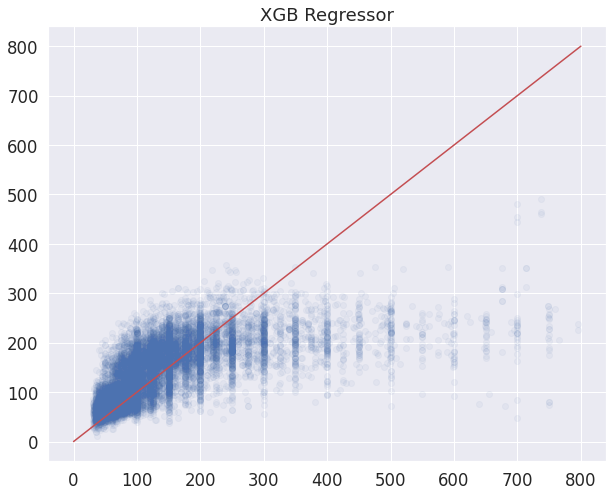

In [177]:
plt.scatter(x=y_test, y=pred_XGB, alpha=0.05)
plt.plot([0, 800], [0,800], 'r-')
plt.title('XGB Regressor')

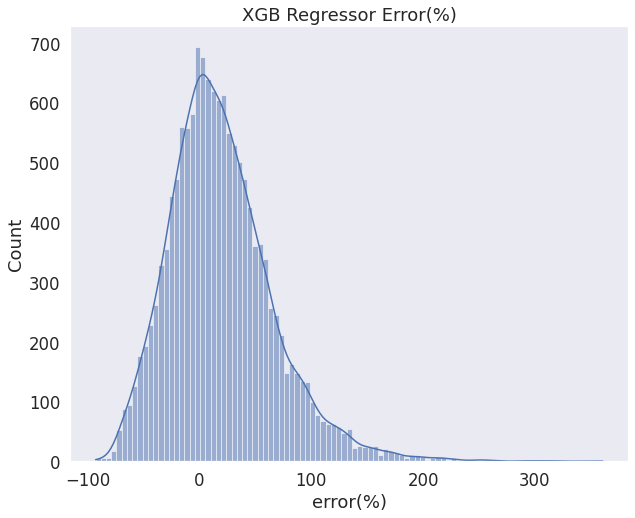

In [178]:
err_XGB = (pred_XGB-y_test)/y_test*100
sns.histplot(err_XGB, kde=True)
plt.xlabel('error(%)')
plt.title('XGB Regressor Error(%)')
plt.grid()

###LGBM Regressor

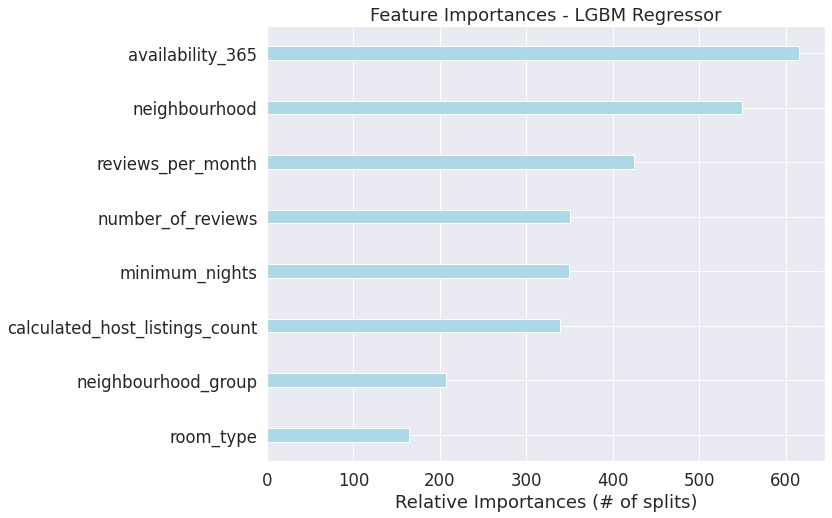

In [179]:
importances_LGB = model_LGB.feature_importances_
indices_LGB = np.argsort(importances_LGB)

plt.title('Feature Importances - LGBM Regressor')
plt.barh(X.columns, importances_LGB[indices_LGB], .25, color='lightblue')
plt.yticks(X.columns, X.columns[indices_LGB])
plt.xlabel('Relative Importances (# of splits)')

plt.show()

Text(0.5, 1.0, 'LGBM Regressor')

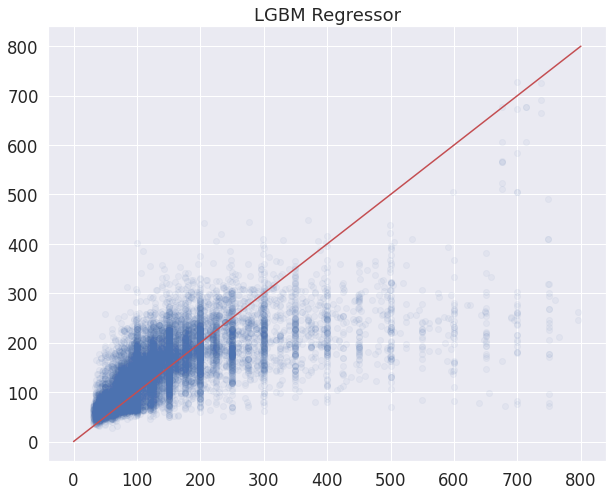

In [180]:
plt.scatter(x=y_test, y=pred_LGB, alpha=0.05)
plt.plot([0, 800], [0,800], 'r-')
plt.title('LGBM Regressor')

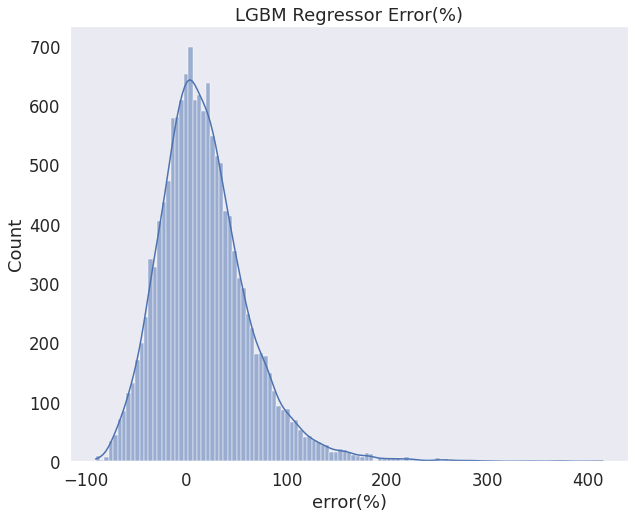

In [181]:
err_LGB = (pred_LGB-y_test)/y_test*100
sns.histplot(err_LGB, kde=True)
plt.xlabel('error(%)')
plt.title('LGBM Regressor Error(%)')
plt.grid()